## Arewa Data Science Academy
### Deep Learning Cohort1.0

#### Name: Muhammad Ibrahim Isah 
#### Email: muhammadibrahimisah0@gmail.com
#### Title: Week 2 Solution

### Exercises Solution

In [58]:
# Q1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).

import torch
import matplotlib.pyplot as plt
from torch import nn

weight = 0.3
bias = 0.9
X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight * X + bias
print("no. of X samples:",X.shape[0])
print("no. of y samples:",y.shape[0])
X[:5],y[:5],X.shape,y.shape

no. of X samples: 100
no. of y samples: 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]),
 torch.Size([100, 1]),
 torch.Size([100, 1]))

In [59]:
 from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

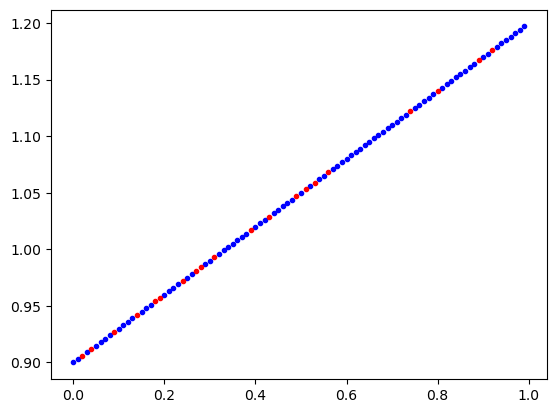

In [60]:
plt.scatter(X_train,y_train,c='b',s=9,label='training data')
plt.scatter(X_test,y_test,c='r',s=9,label='test data')
plt.show()

In [61]:
# Q2. Build a PyTorch model by subclassing `nn.Module`. 


class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(data=torch.randn(1, requires_grad=True, dtype=torch.float))
    
    self.bias = nn.Parameter(data=torch.randn(1,  requires_grad=True, dtype=torch.float ))

  def forward(self, x):
    return self.weight * x + self.bias

  
torch.manual_seed(40)
model = LinearRegressionModel()
model,model.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.9307])), ('bias', tensor([-0.3482]))]))

In [62]:
list(model.parameters())

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [63]:
# Q3 Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)


In [68]:

# Train the model for 300 epochs
torch.manual_seed(40)

epochs = 300


for epoch in range(epochs):
  model.train()
  y_pred = model(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  # backpropagation
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    model.eval()
    with torch.inference_mode():
      y_preds = model(X_test)
      test_loss = loss_fn(y_preds,y_test)
      print(f"Epoch: {epoch} \t Train loss: {loss:.3f} \t Test loss: {test_loss:.3f}")

Epoch: 0 	 Train loss: 0.133 	 Test loss: 0.154
Epoch: 20 	 Train loss: 0.123 	 Test loss: 0.143
Epoch: 40 	 Train loss: 0.114 	 Test loss: 0.132
Epoch: 60 	 Train loss: 0.104 	 Test loss: 0.121
Epoch: 80 	 Train loss: 0.095 	 Test loss: 0.110
Epoch: 100 	 Train loss: 0.086 	 Test loss: 0.099
Epoch: 120 	 Train loss: 0.076 	 Test loss: 0.088
Epoch: 140 	 Train loss: 0.067 	 Test loss: 0.077
Epoch: 160 	 Train loss: 0.057 	 Test loss: 0.066
Epoch: 180 	 Train loss: 0.048 	 Test loss: 0.055
Epoch: 200 	 Train loss: 0.039 	 Test loss: 0.044
Epoch: 220 	 Train loss: 0.029 	 Test loss: 0.033
Epoch: 240 	 Train loss: 0.020 	 Test loss: 0.023
Epoch: 260 	 Train loss: 0.010 	 Test loss: 0.012
Epoch: 280 	 Train loss: 0.007 	 Test loss: 0.005


In [69]:
# Q4. Make predictions with the trained model on the test data

model.eval()

with torch.inference_mode():
  y_preds = model(X_test)
y_preds[:10],y.shape

(tensor([[0.9042],
         [1.1340],
         [1.0463],
         [1.1158],
         [0.9646],
         [1.1702],
         [0.9465],
         [1.1612],
         [0.9767],
         [0.9495]]),
 torch.Size([100, 1]))

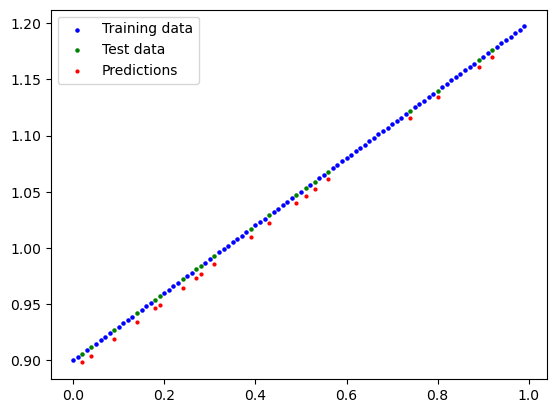

In [70]:
# Plot the training and testing data 
def plot_predictions(X_train,y_train,X_test,y_test,predictions):
  plt.scatter(X_train,y_train,c = 'b',s = 5,label = "Training data")
  plt.scatter(X_test,y_test,c = 'g',s = 5,label = "Test data")
  plt.scatter(X_test,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend()
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

In [67]:
# Q5. Save your trained model's `state_dict()` to file.

torch.save(model.state_dict(), "lr_model")
